## Lecture - 1 (Implicit and Explicit waits)

Suppose we want to check all the flights from Delhi to Mumbai on a particular date. For this we follow the steps:

1. Visit the Travel Website
2. Click "Flights"
3. Enter the details such as the destination and the preffered date
4. Click on the search button
5. Extract all the data that we get in the next page

The problem here is that whil eperforming multiple actions at once, we might need to wait for sometime between 2 consecutive actions otherwise our code might crash because the desired element might not be loaded yet.

In such situations, we have to use "waits". The need for "waits" is :

1. Website is slow (it delays loading).

2. Modern websites are built in such a way that multiple elements load at different intervals of time within the same page.

Hence, in such situations, we need to add "waits" explicitly before the desired steps before which we want to wait for sometime.

### Wait Types :
    
    • Implicit Wait

    • Explicit wait


With the help of implicit waits, we can tell the webdriver to wait for a certain amount of time (fixed) before it searches for a desired element if it is not immediately available.

Let's try to scrape the website : 'https://www.dell.com/en-in' using implicit waits.

In [1]:
# importing the necessary libraries
from selenium import webdriver

# initiating a web driver session (for Google Crome browser)
driver = webdriver.Chrome(executable_path = "/path/to/chromedriver")

C:\Users\SHIBAYAN BISWAS\AppData\Local\Temp\ipykernel_31224\2500609414.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path = "/path/to/chromedriver")


In [2]:
# visiting the website : 'https://www.dell.com/en-in'
driver.get('https://www.dell.com/en-in')

In [7]:
# locating the searchbox and searching for "Gaming Laptops"
from selenium.webdriver.common.by import By

searchbox = driver.find_element(By.CLASS_NAME, 'mh-search-input')
searchbox.send_keys('Gaming Laptops')

# finding the search button and clicking on it
searchbox.find_element(By.XPATH, '//button[@class = "mh-search-btn mh-search-submit"]').click()

# here we apply an implicit wait of 5 seconds (wait until the search result is loaded)
driver.implicitly_wait(5)

# locating and clicking on the 1st laptop from the search result
laptop = driver.find_element(By.XPATH, '//section[contains(@class, "ps-top")]/h3/a')
laptop.click()

In [8]:
# close the webdriver session
driver.close()

Here we observe that the statement for locating and clicking on the 1st laptop from the search result gets execute 5 seconds after we search for "Gaming Laptops".

We should not always use implicit waits as it slows down our script process. Impicit wait is applied globally i.e. it will remain applicable until the driver object is destroyed.

In order to solve this problem, we have explicit waits. The drawback of implicit wait is that if the browser loads in t time lesser than the time assigned in the implicit wait, the browser waits for some extra time. It makes our script slow. Hence to tackle this problem we use explicit wait which requires a "condition" and "upper limit".

In [14]:
# importing the necessary libraries
from selenium import webdriver

# initiating a web driver session (for Google Crome browser)
driver = webdriver.Chrome(executable_path = "/path/to/chromedriver")

C:\Users\SHIBAYAN BISWAS\AppData\Local\Temp\ipykernel_31224\2500609414.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path = "/path/to/chromedriver")


In [15]:
# importing the necessary libraries
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# visiting the website : 'https://www.dell.com/en-in'
driver.get('https://www.dell.com/en-in')

In [16]:
# locating the searchbox and searching for "Gaming Laptops"
from selenium.webdriver.common.by import By

searchbox = driver.find_element(By.CLASS_NAME, 'mh-search-input')
searchbox.send_keys('Gaming Laptops')

# finding the search button and clicking on it
searchbox.find_element(By.XPATH, '//button[@class = "mh-search-btn mh-search-submit"]').click()

# here we declare an explicit wait of 10 seconds maximum (wait until the search result is loaded)
wait = WebDriverWait(driver, 10)

# locating and clicking on the 1st laptop from the search result
laptop = wait.until(EC.presence_of_element_located((By.XPATH, '//section[contains(@class, "ps-top")]/h3/a')))
laptop.click()

In [ ]:
# close the webdriver session
driver.close()

## Lecture - 2 (Radio buttons and Checkbox)

In this lecture, we will see how to deal with radio buttons and checkbox using our "Selenium" code. 

We have these buttons in our webpage while filling out any kind of form or submitting any kind of information. Radio buttons and checkbox are used to make some selection from a given set of values.

For practice purpose we will be using the webpage : 'https://demoqa.com/' which is basically a automation and practice form. The form looks like : 

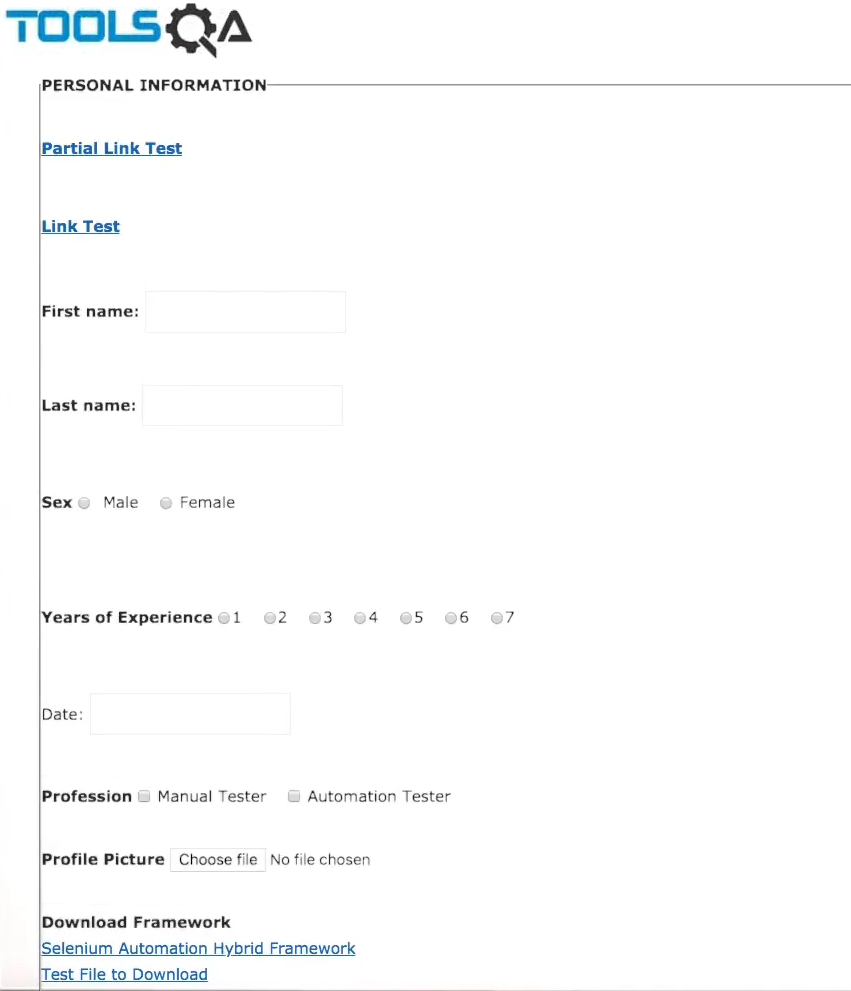

Now let's see how to deal with Radio buttons. Radio buttons allow the selection of only 1 value from a given set of values. Radio buttons does not allow explicit deselection. For deselection, we need to make another selection and the previous value will be deselected.

In [17]:
# importing the necessary libraries
from selenium import webdriver

# initiating a web driver session (for Google Crome browser)
driver = webdriver.Chrome(executable_path = "/path/to/chromedriver")

C:\Users\SHIBAYAN BISWAS\AppData\Local\Temp\ipykernel_31224\2500609414.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path = "/path/to/chromedriver")


In [18]:
# visiting the website : 'https://www.toolsqa.com/automation-practice-form/'
driver.get('https://www.toolsqa.com/automation-practice-form/')

On inspecting the webpage, we see that for  section "Years of Experience" has 7 different radio buttons with the attribute "name" = "exp" for all 7 of them.

In [ ]:
# locating and clicking on the 1st radio button in the section "Years of Experience"
from selenium.webdriver.common.by import By

# locating all the 7 radio buttons
buttons = driver.find_elements(By.NAME, 'exp')

# clicking on the 1st radio button
buttons[0].click()

# to check whether the 1st radio button is selected/not
response = buttons[0].is_selected()

In case of multiple radio buttons, if we want to click the "$i^{th}$" radio button, then we write "buttons[i].click()".

In case of multiple radio buttons, if we want to check whether the "$i^{th}$" radio button is checked or not, then we write "buttons[i].is_selected()".

It returns "true" if the "$i^{th}$" radio button is checked, else it returns "false".

In [19]:
# close the webdriver session
driver.close()

Now let's see how to deal with Checkboxes. In the form given the section "Profession" contains 2 checkboxes. Checkboxes are also used to make selections from a given set of values. It allows multiple selections. In order to deselect a value we have to click on it once more.

In [20]:
# importing the necessary libraries
from selenium import webdriver

# initiating a web driver session (for Google Crome browser)
driver = webdriver.Chrome(executable_path = "/path/to/chromedriver")

C:\Users\SHIBAYAN BISWAS\AppData\Local\Temp\ipykernel_31224\2500609414.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path = "/path/to/chromedriver")


In [21]:
# visiting the website : 'https://www.toolsqa.com/automation-practice-form/'
driver.get('https://www.toolsqa.com/automation-practice-form/')

On inspecting the webpage, we see that for section "Profession" has 2 different checkbox buttons with the attribute "name" = "profession" for all 2 of them.

In [ ]:
# locating and clicking on checkbox buttons in the section "Profession"
from selenium.webdriver.common.by import By

# locating all the 2 checkbox buttons
buttons = driver.find_elements(By.NAME, 'profession')

value =  # desired value(s) that we want select from the checkbox buttons (can be string/list of strings)

# selecting checkbox buttons
for i in buttons:
    if i.get_attribute('value') == value:
        i.click()
        
# deselecting checkbox buttons
for i in buttons:
    if i.is_selected():
        i.click()

In [ ]:
# close the webdriver session
driver.close()

## Lecture - 3 (Handle Dropdowns and Scrolling)

Dropdown elements are important for any kind of webpage or webform that we can see on internet. Whenever we need to select 1 value from a set of given options, dropdowns are actually the best possible way.

For practice purpose we will be using the webpage : 'https://demoqa.com/' which is basically a automation and practice form. The form looks like :

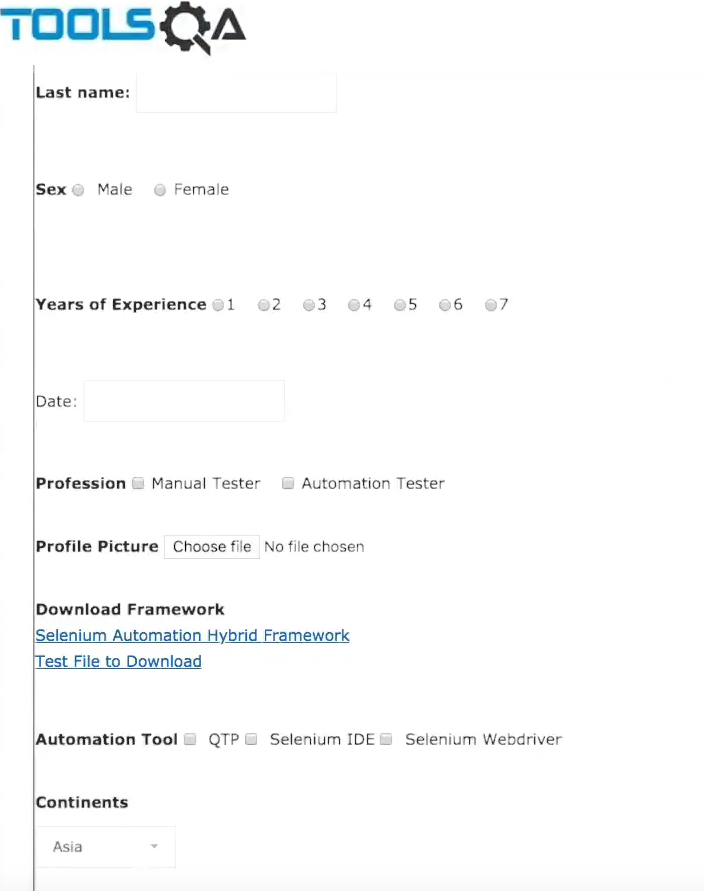

In the form we can see that the section "Continents" has a dropdown. It conatins the list of continents as options out of which we can select only 1 continent.

To handle a dropdown :

1. We have to locate the dropdown element.

2. Locate the desired option that we want to select.

3. Select the desired option.

In [22]:
# importing the necessary libraries
from selenium import webdriver

# initiating a web driver session (for Google Crome browser)
driver = webdriver.Chrome(executable_path = "/path/to/chromedriver")

C:\Users\SHIBAYAN BISWAS\AppData\Local\Temp\ipykernel_31224\2500609414.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path = "/path/to/chromedriver")


In [23]:
# visiting the website : 'https://www.toolsqa.com/automation-practice-form/'
driver.get('https://www.toolsqa.com/automation-practice-form/')

On inspecting the webpage, we see that for section "Continents" there is a "select" tag (dropdown element) with "id" = "continents".

In order to make a selection, "Selenium" provides a class "Select" with the help of which we can select the desired option. 

In [ ]:
# locating the dropdown element in the section "Continents"
from selenium.webdriver.common.by import By
dropdown = driver.find_element(By.ID, 'continents')

In [ ]:
# locating the desired option for which we want to make the selection
from selenium.webdriver.support.select import Select

# creating an object of the class "Select" 
select = Select(dropdown)

Dropdowns can be single select/multiple select type.

The "Select" class supports a lot of different methods and properties which we can call in order to perform a lot of different operations. The attributes and methods are :

    • options

    • first_selected_option

    • select_by_index(index)

    • select_by_value(value)
    
    • select_by_visible_text(text)

    • all_selected_options 

    • deselect_all()

    • deselect_by_index(index)

    • deselect_by_value(value)

    • deselect_by_visible_text(text)


In [ ]:
# close the webdriver session
driver.close()

Now we will see how to scroll the webpage using the "Selenium" webdriver. Whenever we display any page and it does not fit the visible area of our screen then in that situation, in order to get the view of the required part of the page.

We need to be careful beacuse in some cases, on scrolling data on the webpage can change or update.

Let's take the example of "Twitter". As we keep scrolling, new tweets will keep getting displayed. If we are told to extract all the "tweets" which are present on the webpage, in that situation, the scrolling part is must for us. We actually need to scroll to get all the data. We acn verify that by inspecting the webpage also. 

In [24]:
# importing the necessary libraries
from selenium import webdriver

# initiating a web driver session (for Google Crome browser)
driver = webdriver.Chrome(executable_path = "/path/to/chromedriver")

C:\Users\SHIBAYAN BISWAS\AppData\Local\Temp\ipykernel_31224\2500609414.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path = "/path/to/chromedriver")


In [25]:
# visiting the website : 'https://twitter.com/'
driver.get('https://twitter.com/')

In order to scroll the page, we need the help of JavaScript Code. "Selenium" webdriver supports the execution of JavaScript code. For that, we need to call the method "driver.execute_script()". Inside this method, we can write our javaScript code which we want to execute. For example : 

1. **'window.open(" ");'** - To visit a website through in new tab.

2. **'return document.getElementById(" ");'** - To access an element with desired "ID".

3. **'window.scrollBy(x, y);'** - To scroll the webpage horizontally ('x' --> if positive then scroll right, if negative then scroll left) and vertically ('y' --> if positive then scroll down, if negative then scroll up).

4. **'window.scrollTo(x, y);'** - To scroll the webpage horizontally ('x' --> if positive then scroll right, if negative then scroll left) and vertically ('y' --> if positive then scroll down, if negative then scroll up).

In [ ]:
# Scrolling the Twitter page 5 times to load new tweets
import time

for i in range(5):
    # here we scroll down the page by 100 pixels
    driver.execute_script('window.scrollBy(0, 100);')
    # waiting for 5 seconds to see the changes (loading of tweets)
    time.sleep(5)

In [ ]:
# close the webdriver session
driver.close()

Now let's see  the concept of "Infinite Scrolling". This is used when we want to scroll the webpage until new data stops loading.

In order to create the infinite scroller, we need the help of the JavaScript property **'return document.body.scrollHeight;'**. This is used for getting the entire height of the "body" element in pixels from the current webpage. 

This is the maximum that we can scroll at a time. 

In [26]:
# importing the necessary libraries
from selenium import webdriver

# initiating a web driver session (for Google Crome browser)
driver = webdriver.Chrome(executable_path = "/path/to/chromedriver")

C:\Users\SHIBAYAN BISWAS\AppData\Local\Temp\ipykernel_31224\2500609414.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path = "/path/to/chromedriver")


In [27]:
# visiting the website : 'https://twitter.com/'
driver.get('https://twitter.com/')

The plan over here is to first scroll to the maximum extent possible and then repeat this process until new tweets get loaded.

In [ ]:
# scrolling until no more tweets get loaded (infinite scrolling)
import time

# initiating the maximum scroll limit possible
current_height = driver.execute_script('return document.body.scrollHeight;')

# repeating tthe process to perform infinite scrolling
while True:
    # performing the scroll (Note : This is how we pass arguments in JavaScript)
    driver.execute_script('window.scrollTo(0, arguments[0]);', current_height)
    
    # waiting for 3 seconds to see the changes (loading of tweets)
    time.sleep(3)
    
    # generating a new maximum scroll limit
    new_height = driver.execute_script('return document.body.scrollHeight;')
    
    # terminating statement (when no new maximum scroll limit is generated i.e. we have reached the end)
    if new_height == current_height :
        break
        
    # updating the old maximum scroll limit  with the new maximum scroll limit
    current_height = new_height

In [ ]:
# close the webdriver session
driver.close()

## Lecture - 4 (Switching Tab Focus and Handle Popups)

A lot of times we must have faced the situation that after clicking on a link or button, it opens up a new window/tab and we want to perform our furher actions on that new window/tab.

Suppose we visit a website say 'https://codingninjas.in/'. From there we want to shift the focus to another website say "https://twitter.com/". Here we will see how to do that.

In [28]:
# importing the necessary libraries
from selenium import webdriver

# initiating a web driver session (for Google Crome browser)
driver = webdriver.Chrome(executable_path = "/path/to/chromedriver")

C:\Users\SHIBAYAN BISWAS\AppData\Local\Temp\ipykernel_31224\2500609414.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path = "/path/to/chromedriver")


In [ ]:
# visiting the website : 'https://codingninjas.in/'
driver.get('https://codingninjas.in/')

In [ ]:
# visiting the website : 'https://twitter.com/' in a new tab with the help of JavaScript code : 'window.open(" ");'
driver.execute_script('window.open("https://twitter.com/");')

Now we can perform actions on the new tab opened. For example : 

1. **'driver.window_handles'** - To get the list  of tabs (open in the webdriver session).

2. **'driver.current_window_handle'** - To get the current tab (open in the webdriver session).

3. **'driver.switch_to.window()'** - To switch the focus from the current tab to the desired tab.

Note : We can always verify on which tab the focus is currently, with the help of the statement **'driver.title'**.
    

In [ ]:
# Switching the tab focus from 'https://codingninjas.in/' to 'https://twitter.com/'
windows = driver.window_handles
driver.switch_to.window(windows[1])

In [ ]:
# close the webdriver session
driver.close()

Now we will see how to handle Pop-Up Windows with the help of Python code. It is quite a standared practice, which is being followed by different websites to display some alert message with the help of Pop-Up. Let's see tht types of Pop-Up : 

    • Simple Alert

    • Confirmation Alert

    • Prompt Alert

Metods and properties of Pop-Up :

    • alert_obj = driver.switch_to.alert

    • alert_obj.accept() 

    • alert_obj.dismiss()

    • alert.send_keys()

    • alert.text


In [29]:
# importing the necessary libraries
from selenium import webdriver

# initiating a web driver session (for Google Crome browser)
driver = webdriver.Chrome(executable_path = "/path/to/chromedriver")

C:\Users\SHIBAYAN BISWAS\AppData\Local\Temp\ipykernel_31224\2500609414.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path = "/path/to/chromedriver")


In [ ]:
# visiting a local html webpage (for Pop-Up). It should be present in the same directory as that of the Jupyter Notebook, else we have to pass the complete path
driver.get('Sample.html')

In [ ]:
# locating the Pop-Up button
alert = driver.find_element(By.NAME, 'alert')
alert.click()

# switching our focus tob the Pop-Up window
focus = driver.switch_to.alert

# accepting the Pop-Up (click on 'Ok')
focus.accept

In [ ]:
# close the webdriver session
driver.close()